# Pierce County Cost of Living Project

In [2]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats

# Pierce County House Sales Data for 2020

The real estate market in Pierce County, Washington, experienced significant changes and challenges in 2020 due to the impact of the COVID-19 pandemic. As the year unfolded, buyers and sellers navigated a shifting landscape influenced by economic uncertainty, low inventory, and interest rate fluctuations. Despite these hurdles, the housing market remained resilient, driven by continued demand for homes in suburban areas like Pierce County, as remote work became more common and people sought more space.

In Pierce County, the year saw a notable rise in home prices, with a strong preference for single-family homes, especially in the more affordable areas compared to neighboring King County. However, the market also faced inventory shortages, leading to competitive bidding and a seller's market in many regions of the county. For prospective buyers, this presented both challenges and opportunities, while sellers were in a strong position to capitalize on demand.

Despite the pandemic's disruptions, 2020's real estate market in Pierce County demonstrated the area's continued appeal due to its proximity to the Seattle-Tacoma metropolitan area, scenic landscapes, and relatively affordable housing options.

The original `pierce_county_house_sales.csv` data set is a data frame with 16814 rows and 19 variables. For our data science purposes, we have selected only 13 of all variables that are of interest to us.

A description of each of the 13 variables variables is provided below.

Variables              | Descriptions
---------------------- | -----------------------------------------------------
_sale_price_           | Dollar amount recorded for the sale.
_house_square_feet_    | Sum of the square feet for the building.
_basement_square_feet_             | Total square footage of the basement.
_attached_garage_square_feet_                   | Total square footage of the attached or built in garage(s).
_detached_garage_square_feet_            | Total detached garage(s) square footage.
_fireplaces_        | Total count of single, double or PreFab stoves.
_hvac_description_          |Text description associated with the predominant heating source for the built-as structure i.e. Forced Air, Electric Baseboard, Steam, etc. 
_exterior_            | Predominant type of construction materials used for the exterior siding on Residential Buildings.
_stories_         | Number of floors/building levels above grade. Stories do not include attic or basement areas.
_roof_cover_       | Material used for the roof. I.e. Composition Shingles, Wood Shake, Concrete Tile, etc.
_year_built_               | Year the building was built, as stated by the building permit or a historical record.
_bedrooms_    | Number of bedrooms listed for a residential property.
_bathrooms_                  | Number of baths listed for a residential property. If the number is listed as a decimal, i.e. 2.75 = two full and one three-quarter baths. A tub/sink/toilet combination (plus any additional fixtures) is considered 1.0 bath. A shower/sink/toilet combination (plus any additional fixtures) is 0.75 bath. A sink/toilet combination is .5 bath.


In [3]:

house_sales = Table.read_table('pierce_county_house_sales.csv').select(
    ['sale_price', 'house_square_feet', 'basement_square_feet', 'attached_garage_square_feet', 
    'detached_garage_square_feet', 'fireplaces', 'hvac_description',
    'exterior', 'stories', 'roof_cover', 'year_built',
    'bedrooms','bathrooms'])

house_sales

sale_price,house_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,stories,roof_cover,year_built,bedrooms,bathrooms
380000,2157,0,528,0,0,Warm and Cool Air Zone,Frame Siding,2,Composition Shingle,1993,3,3
383000,2238,0,396,0,0,Forced Air,Frame Siding,2,Composition Shingle,2017,4,3
419900,1452,0,0,0,1,Forced Air,Frame Siding,1,Built Up Rock,1965,3,2
251660,832,0,0,0,0,Forced Air,Frame Vinyl,1,Composition Shingle,1919,2,1
500000,1780,384,484,0,1,Forced Air,Frame Siding,1,Composition Shingle,1955,3,2
250000,989,0,0,0,1,Electric Baseboard,Frame Siding,1,Composition Shingle,1925,2,1
360000,2048,0,441,0,1,Forced Air,Frame Siding,2,Composition Shingle,1998,4,3
370000,1118,0,242,0,0,Electric Baseboard,Frame Siding,1,Composition Shingle,1968,3,1
485000,978,968,0,0,1,Warm and Cool Air Zone,Frame Siding,1,Composition Shingle,1925,3,2
475000,2238,0,436,0,1,Heat Pump,Frame Siding,2,Composition Shingle,2019,3,3


## What are the most common features in high-demand properties in Pierce County? By analyzing features such as home size, number of bedrooms/bathrooms, amenities, and other property characteristics, we can understand the attributes of homes that sold quickly and for higher prices. 

In [4]:

freq_dist = house_sales.group('hvac_description').sort('count', descending=True)
freq_dist

hvac_description,count
Forced Air,10382
Electric Baseboard,2668
Heat Pump,2084
Warm and Cool Air Zone,1268
Floor/Wall Furnace,174
Hot Water Baseboard,146
No Heat,82
nan,7
Electric,2
Floor Wall Furnace,1


In [5]:
all_homes = house_sales.num_rows
most_common = freq_dist.column('count').item(0)
percent_preval = (most_common / all_homes) * 100

com_type = freq_dist.column('hvac_description').item(0)
print('The most common Hvac-type is', com_type, 'with a prevalence percentage of', round(percent_preval, 2),'%.')

The most common Hvac-type is Forced Air with a prevalence percentage of 61.75 %.


## What combination of `Number of floors/building levels above grade` and `hvac_description` have the highest `house_square_feet` on average.

In [18]:
average_house_square_feet = house_sales.pivot('hvac_description', 'stories', values='house_square_feet', collect=np.average)
average_house_square_feet

stories,Electric,Electric Baseboard,Floor Wall Furnace,Floor/Wall Furnace,Forced Air,Heat Pump,Hot Water Baseboard,No Heat,Warm and Cool Air Zone,nan
0,0,327.25,0,800,2334.07,2567.38,0,439,1892.5,504
1,364,1121.54,0,892.615,1417.24,1881.2,1702.48,809.216,1783.14,625.75
2,805,1623.56,2958,1511.1,2220.86,2586.41,2544.8,2232,2630.27,658
3,0,2333.5,0,0,2560.63,2799,3738,0,3113.14,0


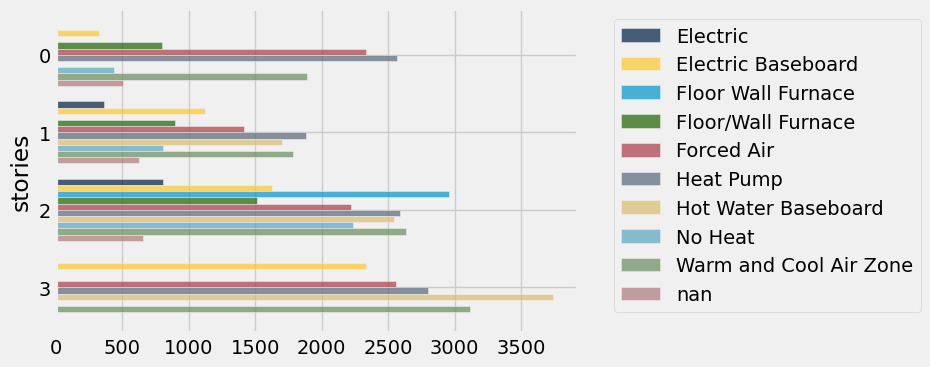

In [19]:
average_house_square_feet.barh(0)

## Function `max_price` that has the following arguments: `roof_type`, `hvac`, `price_min`, `price_max`, `min_bedroom`, and `max_bedroom`. For a given `roof_type` and `hvac`, the function should return the maximum price of only buildings whose prices are as low as the `price_min`, but up to the `price_max` and whose number of bedrooms listed are as low as the `min_bedroom`, but up to the `max_bedroom`. Useful for home hunting.

In [21]:
def max_price(roof_type, hvac, price_min, price_max, min_bedroom, max_bedroom):
    sorted_data = house_sales.where('roof_cover', are.equal_to(roof_type)).where('hvac_description', are.equal_to(hvac)).where('sale_price', are.between(price_min, price_max)).where('bedrooms', are.between(min_bedroom, max_bedroom))
    return max(sorted_data.column('sale_price'))
    return 


max_price('Composition Shingle', 'Forced Air', 1_500_000, 3_000_000, 2, 7)

2900000

## What were the key factors influencing home prices in Pierce County in 2020? This involves analyzing the relationship between home prices and variables like property size, number of bedrooms, location, age of the home, and economic factors (e.g., unemployment rates, interest rates).

## Does the data provide any evidence that `house_square_feet` is an informative predictor of the `sale_price` of a building in Pierce County? 

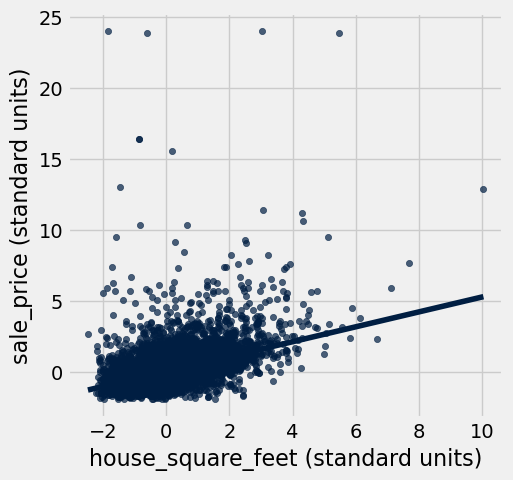

In [62]:

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

Table().with_columns(
    'house_square_feet (standard units)',  standard_units(house_sales.column('house_square_feet')), 
    'sale_price (standard units)', standard_units(house_sales.column('sale_price'))
).scatter(0, 1, fit_line=True)

In [64]:


def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

correlation(house_sales, 'house_square_feet', 'sale_price')

0.52632567892659499

95% confidence interval for slope: [155.297, 171.675]


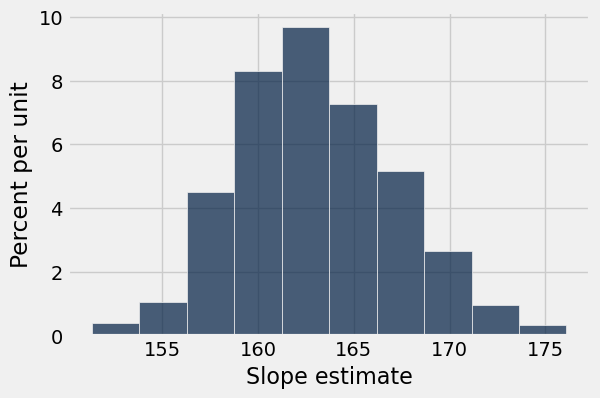

In [68]:

def fit_line(tbl, x_col, y_col):
    x = tbl.column(x_col)
    y = tbl.column(y_col)
    
    r = correlation(tbl, x_col, y_col)
    std_x = np.std(x)
    std_y = np.std(y)
    
    slope = r * (std_y / std_x)
    intercept = np.mean(y) - slope * np.mean(x)
    
    return make_array(slope, intercept)

fit_line(house_sales, "house_square_feet", "sale_price")

resample_slopes = make_array()

for i in np.arange(500): 
    house_sales_resample = house_sales.sample()
    resample_line = fit_line(house_sales_resample, "house_square_feet", "sale_price")
    resample_slope = resample_line.item(0) 
    resample_slopes = np.append(resample_slopes, resample_slope)
    
Table().with_column("Slope estimate", resample_slopes).hist()

lower_end = np.percentile(resample_slopes, 2.5)
upper_end = np.percentile(resample_slopes, 97.5)
print("95% confidence interval for slope: [{:g}, {:g}]".format(lower_end, upper_end))

In this case, our null hypothesis was that the slope of the regression line between house square feet and sale price is 0. Our alternative hypothesis was that the slope of the regression line between house square feet and sale price is not 0. Based on the confidence interval, we would reject the null hypothesis that the true slope is 0 because the interval does not contain 0. Since the interval does not contain the number 0, then we reject the null (in favor of the alternative). This means that there is a relationship between x and y such that when you are given x you can determine y. The p-value cutoff we are using is 0.05, corresponding to the 95% confidence level. In this case, the confidence interval not containing 0 supports rejecting the null hypothesis at the 0.05 significance level. All in all, there is statistically significant relationship between house square feet and sale price, meaning that there is evidence that house_square_feet is an informative predictor of the sale_price of a building in Pierce County.

## Are buildings with 0 or 1 stories less spacious(measured by the size of `house_square_feet`) than stories with 2 or more stories? Does this data suggest that the `house_square_feet` of buildings with 0 or 1 stories is lesser on average than the `house_square_feet` of buildings with 2 or more stories. 

In [26]:
def Class(x):
    if x <= 1:
        return '1'
    elif x >= 2:
        return '0'

class_variable = house_sales.apply(Class, 'stories')

house_hyp = house_sales.with_column('Class', class_variable)

In [74]:
zero_avg_square_feet = np.average(house_hyp.where('Class', '0').column('house_square_feet'))
one_avg_square_feet = np.average(house_hyp.where('Class', '1').column('house_square_feet'))

def square_feet_avg(Class):
    if Class == '1':
        return one_avg_square_feet
    elif Class == '0':
        return zero_avg_square_feet
    
avg_square_feet = house_hyp.apply(square_feet_avg, 'Class')

class_square_feet = house_hyp.select('Class', 'house_square_feet')
Class_average = class_square_feet.group('Class', np.average)
Class_average

Class,house_square_feet average
0,2261.95
1,1403.94


In [75]:
observed_value = Class_average.column('house_square_feet average').item(0) - Class_average.column('house_square_feet average').item(1)
observed_value

858.0145122524884

In [76]:
def mean_diff(table, num_var, categ_var):
    reduced = table.select(categ_var, num_var)
    means_table = reduced.group(categ_var, np.average)
    means = means_table.column(1)
    observed_diff = means.item(1) - means.item(0)
    return observed_diff

mean_diff(house_hyp, 'house_square_feet', 'Class')

-858.0145122524884

In [77]:
shuffled_labels = house_hyp.sample(with_replacement=False).column('Class')

In [78]:
def one_simulated_diff(table, num_var, categ_var):
    shuffled_labels = table.sample(with_replacement=False).column(categ_var)
    shuffled_table = table.select(num_var).with_column('Shuffled Labels', shuffled_labels)
    return mean_diff(shuffled_table, num_var, 'Shuffled Labels')

one_simulated_diff(house_hyp, 'house_square_feet', 'Class')

21.56836695507991

In [79]:
differences = make_array()

for i in np.arange(100):
    differences = np.append(differences, one_simulated_diff(house_hyp, 'house_square_feet', 'Class'))

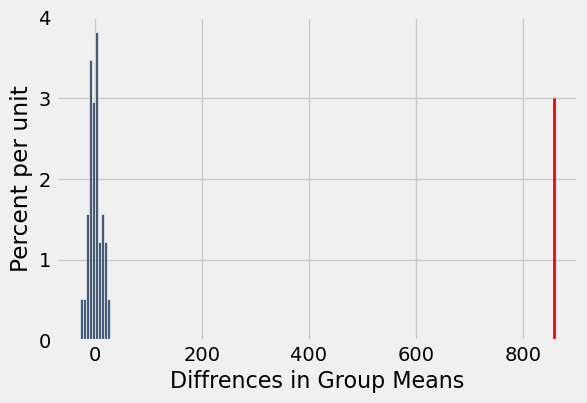

In [80]:
Table().with_column('Diffrences in Group Means', differences).hist()
plots.plot([observed_value, observed_value], [0, 0.03], color = 'red', lw=2);

In [81]:
p_value = sum(differences >= observed_value) / 100
p_value

0.0

In this case, our null hypothesis states that there is no difference on average between the house square feet of buildings with 0 or 1 stories and the house square feet of of buildings with 2 or more stories. Our alternative hypothesis states that the house square feet of buildings with 0 or 1 stories is lesser on average than the house square feet of of buildings with 2 or more stories. At the 0.05, significance level the null hypothesis should be rejected because the p-value of 0.0 is less than the alpha of 0.05. Since the observed test statistic was 0, it indicated that the observed test statistic was not at all close to what the null hypothesis states, meaning the data rejects null hypothesis and is more in favor of the alternative hypothesis. In this case, this means that the data more so supports the claim that the house square feet of buildings with 0 or 1 stories is lesser on average than the house square feet of of buildings with 2 or more stories, also meaning that the difference in the average square feet of houses based on stories was unlikely to have happened because of random chance. 

## Is it possible predict whether a building is of class 1(0 or 1 stories) or of class 0(2 or more stories), based on the _dollar amount recorded for the sale_ and _sum of the square feet for the building_?

In [41]:

def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

sale_price_std = standard_units(house_sales.column('sale_price'))
house_square_feet_std = standard_units(house_sales.column('house_square_feet'))


house_classify = Table().with_columns(
    'sale_price (std)', sale_price_std,
    'house_square_feet (std)', house_square_feet_std,
    'Class', class_variable
)
house_classify

sale_price (std),house_square_feet (std),Class
-0.344097,0.36436,0
-0.331389,0.470883,0
-0.175084,-0.562788,1
-0.887735,-1.37815,1
0.164213,-0.131434,1
-0.894767,-1.17168,1
-0.428816,0.221014,0
-0.386456,-1.00203,1
0.100674,-1.18615,1
0.0583151,0.470883,0


In [44]:

shuffled_house_classify = house_classify.sample(with_replacement=False).take(np.arange(3000))

np.random.seed(1236514109)


In [50]:

train_size = int(np.round(shuffled_house_classify.num_rows * 0.70))
house_train = shuffled_house_classify.take(np.arange(train_size))
house_test = shuffled_house_classify.take(np.arange(train_size, shuffled_house_classify.num_rows)) 

In [53]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

def distances(training, example):
    """
    Compute distance between example and every row in training.
    Return training augmented with Distance column
    """
    distances = make_array()
    attributes_only = training.drop('Class')
    
    for i in np.arange(attributes_only.num_rows):
        row = attributes_only.row(i)
        distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

def closest(training, example, k):
    """
    Return a table of the k closest neighbors to example
    """
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))


def majority_class(topk):
    """
    Return the class with the highest count
    """
    return topk.group('Class').sort('count', descending=True).column(0).item(0)

def classify(training, example, k):
    """
    Return the majority class among the 
    k nearest neighbors of example
    """
    return majority_class(closest(training, example, k))

def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [54]:

model_accuracy = evaluate_accuracy(house_train, house_test, 5)
model_accuracy

0.7822222222222223